# Übungsaufgaben 1

### 1. Aufgabe `kbytes`
Schreiben Sie ein Skript `kbytes.bash`, das f&uuml;r jede &uuml;bergebene Datei die Gr&ouml;&szlig;e der Datei in Kilobytes (=Bytes/1000) ausgibt.  Besipiel:
```bash
$./kbytes.bash *.txt
a.txt: 3K
b.txt: 0K
c.txt: 10K
$
```


#### kbytes.bash:

In [1]:
%%bash
#!/bin/bash        
for f in "$@"; do
    bytes=$(cat $f | wc -c)
    kbytes=$((bytes/1000)) #Umrechnung in Kilobytes
    echo $f: ${kbytes}K #ohne Klammern: unbekannte Variable $kbytesK
done

#### Usage:

In [43]:
%%bash
./kbytes.bash dir/*.txt

dir/a.txt: 0K
dir/b.txt: 1K


### 2. Aufgabe `man_words`
Schreiben Sie ein Skript `man_words.bash`, das  das f&uuml;r jede &uuml;bergebenen Namen die Anzahl der W&ouml;rter in der entsprechenden Manpage vorkommt.
Falls f&uuml;r einen Namen kein Manpage-Eintrag existiert, soll `??` ausgegeben werden.  Beispiel:
```bash
$ ./man_words.bash ls xx
ls: 945
xx: ??
$
```


#### man_words.bash:

In [3]:
%%bash
#!/bin/bash
for p in "$@"; do
    if man $p > /dev/null 2>&1; then #Umleitung Ausgabe nach /dev/null = null device von UNIX, Inhalt dieses Dateihandles wird verworfen; 
                                     #auch Umleitung Error-Ausgabe (falls keine Manpage vorhanden)
        echo $p: $(man $p | wc -w)
    else
        echo $p: ??
    fi
done

#### Usage:

In [4]:
%%bash
./man_words.bash ls xx

ls: 2285
xx: ??


### 3. Aufgabe `add_header`
Schreiben Sie ein Skript `add_header.bash`, das seine Standardeingabe liest, dieser einen Header voranstellt. 
Die vorangestellten Header-Zeilen sollen dabei die einzelnen Kommandozeilenargumente sein.  Beispiel:
```bash
$ echo "Hello, world!" | ./add_header '# my' '# header'
# my
# header
Hello, world!
$
```


#### add_header.bash:

In [5]:
%%bash
#!/bin/bash
for h in "$@"; do
    echo $h
done
cat #liest Standardeingabe

#### Usage:

In [6]:
%%bash
echo "Hello, world!" | ./add_header.bash '# my' '# header'

# my
# header
Hello, world!


In [7]:
%%bash
./add_header.bash '# my' '# header' < kbytes.bash

# my
# header
#!/bin/bash
for f in "$@"; do

#    if [[ ! -f $f ]]; then
#        echo "not a dir: $f"
#        exit 1
#    fi

    bytes=$(cat $f | wc -c)
    kbytes=$((bytes/1000))
    echo $f: ${kbytes}K
done



### 4. Aufgabe `freq_list`

Schreiben Sie ein Bash-Skript, das für eine Textdatei
(z.B. `wahlverwandschaften.txt`) die Frequenzen der Wörter im Text berechnet und
diese dann mitsamt ihrer Frequenzen zeilenweise nach `stdout` schreibt. 

Verwenden Sie dazu: 
- `tr` zur Erstellung einer Tokenliste 
- `sort` zur alphabetischen Sortierung 
- `uniq` zur Zählung der Types 
- `sort` für eine abschließende Frequenzsortierung.

Beispiel:

```bash
$ ./freq_list.bash wahlverwandschaften.txt
17 der
216 in
13 sagte
...
$
```






#### freq_list.bash (with comments):

In [8]:
%%bash
#!/bin/bash

if [[ $# != 1 ]]; then
    echo "Usage $0 FILE" && exit 1
fi

cat $1 | 
tr -d "[:punct:][:cntrl:]"  | #Satzzeichen entfernen 
tr -s " " "\n" | ##Tokenliste
sort -f | #alphabetische Sortierung
uniq -ic | #Types zählen
sort -nr #> freq.txt #absteigende Sortierung und Ausgabe

Usage bash FILE


#### Usage:

In [9]:
%%bash
bash freq_list.bash

Usage freq_list.bash FILE


In [10]:
%%bash
bash freq_list.bash text.txt

   3 weiß
   3 Ich
   2 dass
   1 nichts


#### Frequenzen für `wahlverwandschaften.txt`:

In [11]:
%%bash
bash freq_list.bash ../wahlverwandschaften.txt | head

 282 Und
 215 Die
 156 Zu
 153 Der
 144 Sie
 131 nicht
 126 Ich
 122 Er
 114 So
 112 sich



### 5. Aufgabe `bigrams`

#### 5a: Bash-Skript
Schreiben Sie ein Bash-Skript, das für eine Textdatei
(z.B. `wahlverwandschaften.txt`) die Bigramme im Text berechnet und
diese dann mitsamt ihrer Frequenzen zeilenweise nach `stdout` schreibt
(Hinweise: `man paste`, Sie können auch temporäre Dateien verwenden,
schauen sie sich die verschiedenen Optionen von `tail` genauer an). 
Beispiel:

```bash
$ ./bigrams.bash wahlverwandschaften.txt
17 der Hauptmann
16 in der
13 sagte Eduard
...
$
```


In [12]:
%%bash
#!/bin/bash

if [[ $# != 1 ]]; then
    echo "Usage $0 FILE" && exit 1
fi

cat $1 | tr -d '[:digit:]' | tr '[:punct:]' ' ' | tr -s ' ' '\n' > toks.txt #create temporary file
tail -n +2 toks.txt | paste -d " " toks.txt - | sort -f | uniq -ic | sort -nr # create bigram lists

rm toks.txt #remove temporary file

Usage bash FILE


In [13]:
%%bash
bash bigrams.bash

Usage bigrams.bash FILE


In [14]:
%%bash
bash bigrams.bash text.txt

   2 weiß dass
   2 dass ich
   2 Ich weiß
   1 weiß 
   1 nichts weiß
   1 ich nichts


##### zur Erläuterung der Verwendung von paste und temporärer toks-Tokenliste:

In [38]:
%%bash
cat text.txt | tr -d '[:digit:]' | tr '[:punct:]' ' ' | tr -s ' ' '\n' > toks.txt
cat toks.txt

Ich
weiß
dass
ich
weiß
dass
ich
nichts
weiß


In [40]:
%%bash
paste toks.txt toks.txt

Ich	Ich
weiß	weiß
dass	dass
ich	ich
weiß	weiß
dass	dass
ich	ich
nichts	nichts
weiß	weiß


In [41]:
%%bash
cat toks.txt | paste toks.txt -

Ich	Ich
weiß	weiß
dass	dass
ich	ich
weiß	weiß
dass	dass
ich	ich
nichts	nichts
weiß	weiß


In [42]:
%%bash
#Ausgabe der Zeilen ab Zeile 2:
tail -n +2 toks.txt | paste toks.txt - #Lesen von Standardeingabe 

Ich	weiß
weiß	dass
dass	ich
ich	weiß
weiß	dass
dass	ich
ich	nichts
nichts	weiß
weiß	


---
#### 5b: Bigramm-Plot
Wie können Sie nun die Verteilung der Bigramme mit `plot.py` plotten?


#### plot.py:

In [ ]:
#!/usr/bin/env python3
import argparse
import sys
import matplotlib.pyplot as plt

parser = argparse.ArgumentParser(description='write a plot to an image file')
parser.add_argument(
    '-l', '--logarithmic', help='use logarithmic scale', action='store_true')
parser.add_argument(
    '-o', '--out', help='set output file name', type=str, default='out.png')
args = parser.parse_args()

nums = [int(num) for num in sys.stdin.readlines()]
if args.logarithmic:
    plt.xscale("log")
    plt.yscale("log")
    
plt.plot(nums)
# Alternativ: plt.plot
plt.savefig(args.out)

#### Usage:

In [24]:
%%bash
echo -e "1\n2"

1
2


In [25]:
%%bash
echo -e "1\n2" | ./../plot.py -o out/out_test

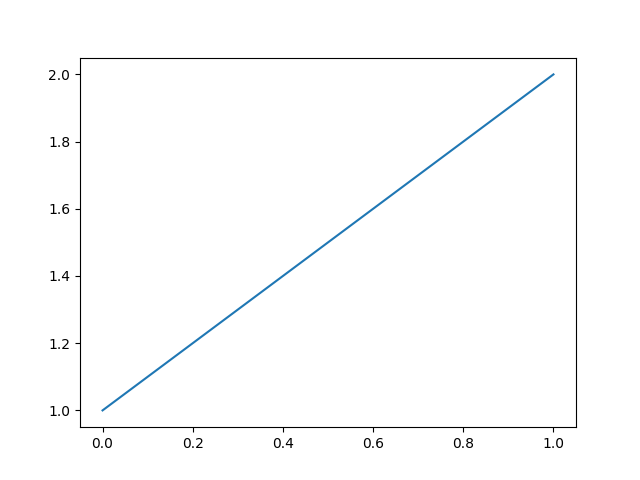

In [26]:
from IPython.display import Image
Image(filename='out/out_test.png', width='50%') 

In [27]:
#import matplotlib.pyplot as plt
#nums = [1,2]
#plt.plot(nums)
#plt.show() 

#### Bigramm-Testdaten aufbereiten:

In [28]:
%%bash
bash bigrams.bash text.txt

   2 weiß dass
   2 dass ich
   2 Ich weiß
   1 weiß 
   1 nichts weiß
   1 ich nichts


In [29]:
%%bash
bash bigrams.bash text.txt | tr -cd "[:digit:]\n"

2
2
2
1
1
1


In [30]:
%%bash
#alternativ mit read line + Array:
bash bigrams.bash text.txt |
  while read -r line
  do
    a=(${line}) #create array
    echo ${a[0]}
done

2
2
2
1
1
1


In [31]:
%%bash
bash bigrams.bash text.txt | tr -cd "[:digit:]\n" | ./../plot.py -o out/out

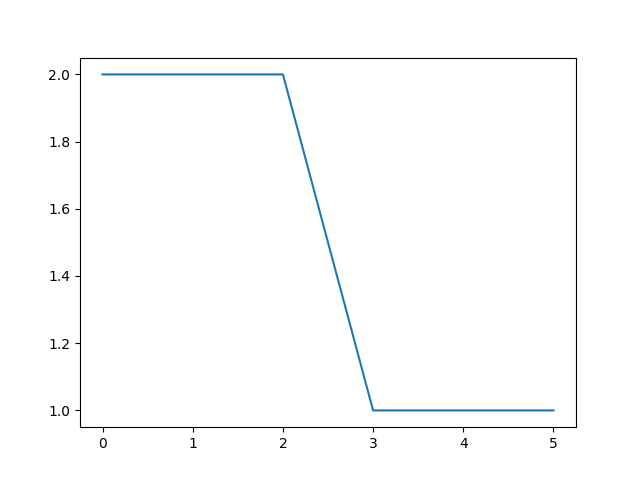

In [32]:
Image(filename='out/out.png', width='50%') 

#### Bigramme für `wahlverwandschaften.txt`:

In [33]:
%%bash
bash bigrams.bash ../wahlverwandschaften.txt > wahlverw_bigrams.txt
head wahlverw_bigrams.txt
tail wahlverw_bigrams.txt

  25 Der Hauptmann
  17 versetzte Charlotte
  16 sagte Charlotte
  16 In der
  13 sagte Eduard
  12 daß er
  11 er sich
  11 daß man
  10 versetzte Eduard
  10 daß sie
   1 Aber Charlotte
   1 Abends fiel
   1 Abends der
   1 Abende und
   1 Abende etwas
   1 Abende deine
   1 Abend veranlaßte
   1 Abend bei
   1 A wird
   1 A vor


---
##### Bigramm-Plot Wahlverwandschaften:


In [34]:
%%bash
bash bigrams.bash ../wahlverwandschaften.txt | tr -cd "[:digit:]\n" | ./../plot.py -o out/wahlverw_out

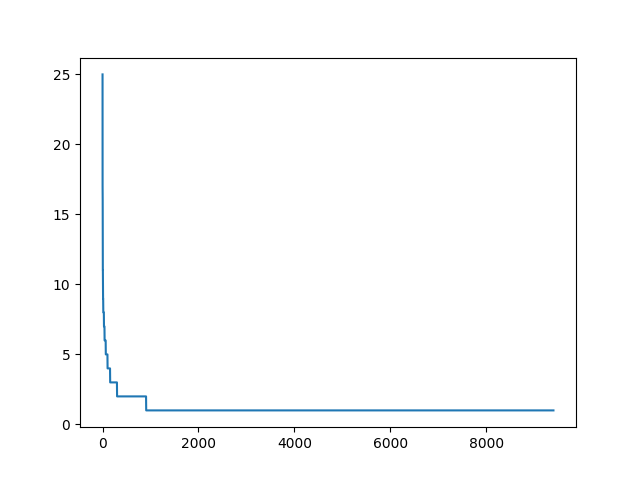

In [35]:
Image(filename='out/wahlverw_out.png', width='50%')

##### Bigramm-Plot logarithmisch:

In [36]:
%%bash
bash bigrams.bash ../wahlverwandschaften.txt | tr -cd "[:digit:]\n" | ./../plot.py -lo out/wahlverw_log_out

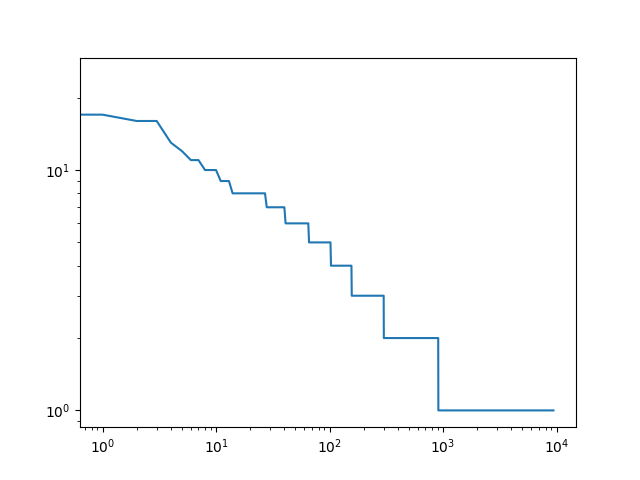

In [37]:
Image(filename='out/wahlverw_log_out.png', width='50%')